In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
# read CSV file into a pandas DataFrame

happiness_report = pd.read_csv('Resources/HappinessModelData.csv')
happiness_report.head()

,Unnamed: 0,Year,Country,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
0,0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [3]:
happiness_report.describe()

,Unnamed: 0,Year,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,77.487152,2017.485011,5.392959,2.287469,1.034541,11.068956,0.472209,0.224981,0.180419
std,45.005506,1.709092,1.124630,3.163031,0.321271,23.809733,0.201976,0.254946,0.154060
min,0.000000,2015.000000,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907
25%,39.000000,2016.000000,4.537500,0.694717,0.819287,0.508000,0.339463,0.061039,0.098123
50%,77.500000,2017.000000,5.350250,1.069659,1.035210,0.708139,0.465965,0.110800,0.182975
75%,116.000000,2019.000000,6.196500,1.395324,1.281355,0.892595,0.585893,0.285300,0.262000
max,157.000000,2020.000000,7.808700,11.450681,1.644000,76.804581,0.974998,0.935585,0.838075


In [4]:
#Assign the data to x and y

X = happiness_report[["GDP", "SocialSupport", "Health", "Freedom", "GovtTrust", "Generosity"]]
y = happiness_report["HappyScore"].values.reshape(-1,1)
print(X.shape, y.shape)

(934, 6) (934, 1)


In [5]:
#use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [6]:
#Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6138516414501787
Testing Score: 0.7079280782120035


In [8]:
#score the model
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.6395461701128571


Text(0.5, 1.0, 'Residual Plot')

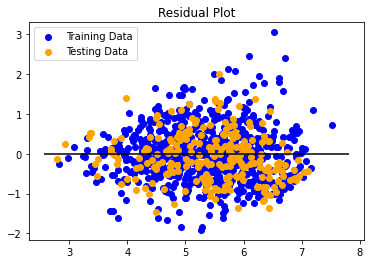

In [9]:
#Plot the Residuals for the Training and Testing Data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [10]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
Intercept = reg.intercept_
Coefficients = reg.coef_

In [12]:
Intercept

array([2.15845237])

In [13]:
Coefficients

array([[ 1.09315964,  1.23950887, -0.14113336,  1.90002874, -0.22851338,
         0.9312475 ]])

Linear Regression Model: 
y = 2.1584x + 1.09315x1 + 1.2395x2 + -0.14113x3 + 1.9x4 + -0.22851x5 + 0.9312x6

Quartiles: 
GDP: 
min: 0
25%: .6947
50%: 1.069659
75%: 1.3953
max: 11.450681 (probably an outlier)

Social Support
min: 0
25%: .819287
50%: 1.0352
75%: 1.281355
max: 1.644

Health
min: 0
25%: .5080
50%: .708139
75%: .892595
max: 76.804581 (probably an outlier)

Freedom
min: 0
25%: .339463
50%: .465965
75%: .585893
max: .974998

GovtTrust
min: 0
25%: .061039
50%: .1108
75%: .2853
max: .935585

Genorosity
min: -0.300907
25%: .098123
50%: .182975
75%: .262
max: .838075

Overall Average Happiness Score: 5.392959

In [14]:
column = happiness_report["GDP"]
max_index = column.idxmax()
print(max_index)

790


In [23]:
#drop unnamed and year columns into new DF
happiness_report_df = happiness_report.drop(columns = ["Unnamed: 0", "Year"])
happiness_report_df

,Country,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
0,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...
929,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.891807,0.082410
930,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.183541,0.055484
931,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064
932,South Sudan,2.8166,7.425360,0.553707,51.000000,0.451314,0.763417,0.016519


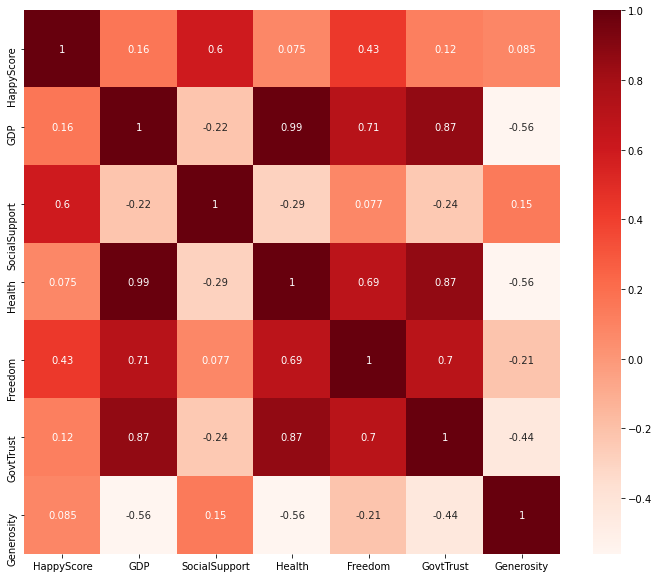

In [24]:
#Pearson Correlation
plt.figure(figsize= (12,10))
cor = happiness_report_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [25]:
#correlation with output variable
cor_target = abs(cor["HappyScore"])
cor_target

HappyScore       1.000000
GDP              0.163281
SocialSupport    0.596504
Health           0.074670
Freedom          0.428059
GovtTrust        0.120140
Generosity       0.085193
Name: HappyScore, dtype: float64

In [ ]:
#chi-squared: does the data match expectations?